# Importer les packages nécessaires

In [14]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Importer la base de données Iris

In [15]:
# Importation du data
data = pd.read_csv('Xclara.csv')
# Affichage de la taille du data
print(data.shape)
# Affichage de l'entête du data 
data.head()

(3000, 3)


,Unnamed: 0,V1,V2
0,1,2.072345,-3.241693
1,2,17.936710,15.784810
2,3,1.083576,7.319176
3,4,11.120670,14.406780
4,5,23.711550,2.557729


# Extraire les valeurs du data et les tracer

[[  2.072345  -3.241693]
 [ 17.93671   15.78481 ]
 [  1.083576   7.319176]
 ...
 [ 64.46532  -10.50136 ]
 [ 90.72282  -12.25584 ]
 [ 64.87976  -24.87731 ]]


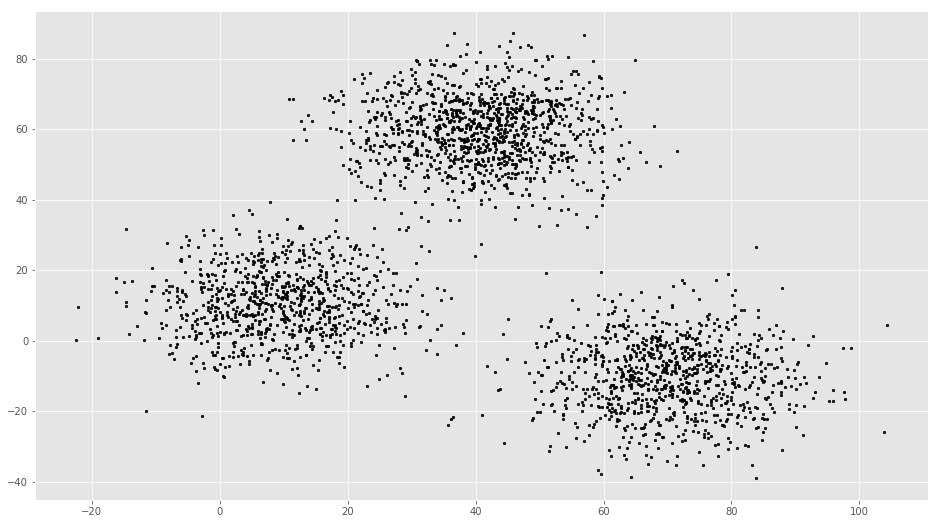

In [16]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
print(X)
plt.scatter(f1, f2, c='black', s=7)

# Fonction pour calculer la distance euclidean

In [17]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Initialisation des variables

In [18]:
# Nombre de classes
k = 3
# Taille du matrice qui contient les valeurs du data
c = X.shape[1]
n = X.shape[0]
# Initialisation des k centres initiaux des k classes
C = np.random.randn(k,c)
for i in range(k):
    C[i]=X[np.random.randint(0,n-1)]
print(C)    

[[39.83018 55.04155]
 [44.43309 58.9645 ]
 [28.67938 67.39531]]


# Tracer les centres initiaux

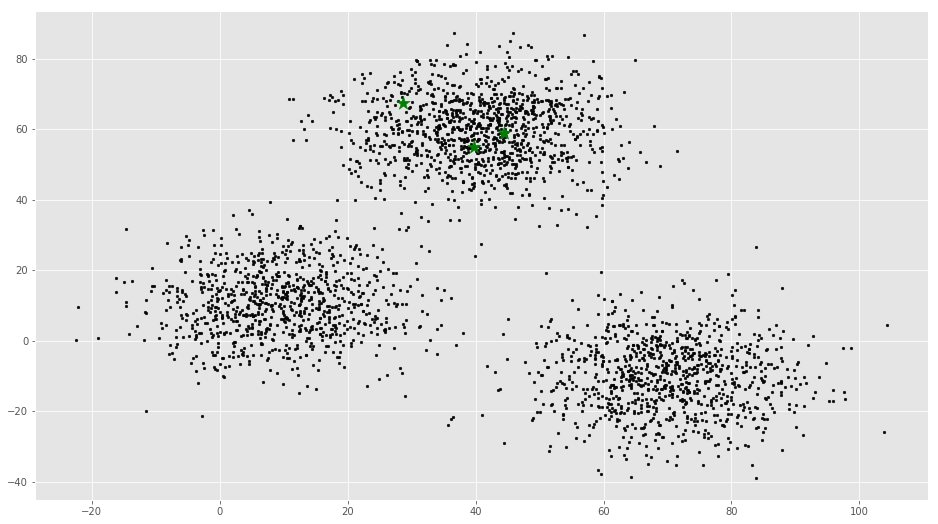

In [19]:
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C[:,0], C[:,1], marker='*', s=200, c='g')

plt.grid(True)
plt.show()

# Appliquer le kmeans

In [20]:
# Pour stocker les valeurs des centres qu'on ils sont modifiés
C_old = np.zeros(C.shape)
# Labels des classes(0, 1, 2)
clusters = np.zeros(len(X))
# Fonction d'erreur - La distance entre les nouveaux et les anciens centres
error = dist(C, C_old, None)
# Boucler jusqu'à ce que l'erreur devient zero
while error != 0:
    # Assigner chaque valeur à la classe la plus proche à elle
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Stocker l'ancienne valeur des centres
    C_old = deepcopy(C)
    # Trouver le nouveau centre en se basant sur la moyenne
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

# Affichage des centres finaux et les classes

In [21]:
print(C)
print(clusters)

[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]
[2. 2. 2. ... 0. 0. 0.]


# Tracer les centres finaux avec leurs classes

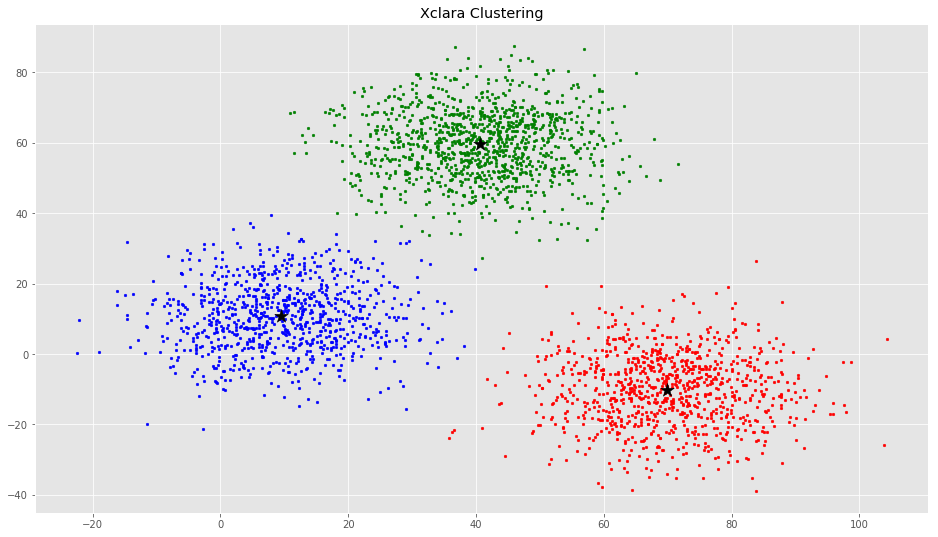

In [22]:
colors = ['r', 'g', 'b']
labels=['setosa','versicolor','virginica']
recs = []
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='black')

plt.grid(True)
plt.title('Xclara Clustering')
plt.show()